In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
df = pd.read_csv('ML2017.csv')


In [134]:
#df.drop(['Municipio','cod_ibge','Unnamed: 0','Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%)'], axis = 1, inplace = True)

s_df = df.drop('M05Q02930',axis = 1) ##Tirei só a target




In [135]:
s_df

,Unnamed: 0,Municipio,cod_ibge,M05Q02650,M05Q02630,M05Q02640,M05Q00100,M05Q00200,M05Q00300,M05Q00600,M05Q00800,M05Q00900,M05Q01400,Tx cobertura da coleta RDO em relação à pop. total(%),Massa [RDO+RPU] coletada per capita em relação à pop. urbana(Kg/(hab.x dia)),Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%),Consumo médio percapita de água
0,0,Altair,350090,0,0,0,0,1,0,0,1,1,1,99.90,1.68,4.31,146.45
1,1,Americana,350160,0,0,0,1,1,1,0,1,1,1,99.53,0.74,0.84,163.98
2,2,Alumínio,350115,0,1,1,1,1,0,0,1,1,1,100.00,0.92,8.37,153.01
3,3,Américo Brasiliense,350170,0,0,0,1,0,1,0,1,1,1,99.24,0.57,NaN,173.12
4,4,Amparo,350190,1,1,1,1,1,1,0,1,1,1,99.00,0.85,4.60,169.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,170,Valinhos,355620,0,0,0,0,1,1,0,0,1,1,100.00,0.86,0.42,185.32
167,171,Ubarana,355535,0,0,0,1,0,0,0,1,1,1,100.00,2.24,NaN,181.02
168,172,Ubatuba,355540,0,0,0,1,0,0,0,1,1,1,100.00,1.37,NaN,305.81
169,173,Vargem Grande Paulista,355645,0,0,0,1,0,0,0,1,1,1,100.00,0.78,0.01,117.30


In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(s_df.drop(['Municipio','cod_ibge','Unnamed: 0','Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%)'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [138]:
scaled_data = scaler.transform(s_df.drop(['Municipio','cod_ibge','Unnamed: 0','Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%)'], axis=1)) ##normalizando

In [139]:
from sklearn.decomposition import PCA

In [211]:
pca = PCA(n_components=8) ##variar o numero de componentes que quero aqui
pca.fit(scaled_data)  #Adaptando meu PCA ao scaled_data
x_pca = pca.transform(scaled_data) #### criando meu x 

In [142]:
from sklearn.model_selection import train_test_split

In [19]:
##Agora posso passar esse dataset em diferentes métodos de machine learning

In [158]:
## Regressão 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
sizes = [0.1,0.2,0.3,0.4]
for size in sizes:
    xtrain,xtest,ytrain,ytest= train_test_split(x_pca,df['M05Q02930'], test_size = size)
    lm.fit(xtrain,ytrain)
    print(lm.score(xtest,ytest))
## O resultado pra esse é péssimo 

-0.08641722697945031
-0.3755894110615505
0.10118653307550973
-0.263255028273536


In [159]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
for size in sizes:
    xtrain,xtest,ytrain,ytest= train_test_split(x_pca,df['M05Q02930'], test_size = size)

    dtree.fit(xtrain,ytrain)
    print(dtree.score(xtest,ytest))
#Resultado melhor mas ainda não satisfatório


0.2777777777777778
0.34285714285714286
0.4230769230769231
0.36231884057971014


In [212]:
# Decision tree com random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
for size in sizes:
    xtrain,xtest,ytrain,ytest= train_test_split(x_pca,df['M050Q2930 - Quali'], test_size = size)
    rfc.fit(xtrain, ytrain)
    print(rfc.score(xtest,ytest))

0.6111111111111112
0.5142857142857142
0.5384615384615384
0.6086956521739131


In [175]:
from sklearn.metrics import confusion_matrix, classification_report

In [181]:
print(confusion_matrix(rfc.predict(xtest),ytest))
print(classification_report(rfc.predict(xtest),ytest))

[[30 16]
 [16  7]]
              precision    recall  f1-score   support

 Curto prazo       0.65      0.65      0.65        46
 Longo prazo       0.30      0.30      0.30        23

    accuracy                           0.54        69
   macro avg       0.48      0.48      0.48        69
weighted avg       0.54      0.54      0.54        69



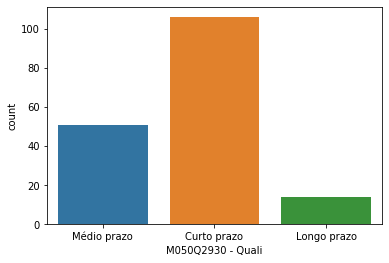

In [262]:
plt.figure()
sns.countplot(df['M050Q2930 - Quali'])  
##Preciso aumentar essa amostragem - vou incluir dados de 2017. 

In [197]:
df.corr()>0.1

,Unnamed: 0,M05Q02930,cod_ibge,M05Q02650,M05Q02630,M05Q02640,M05Q00100,M05Q00200,M05Q00300,M05Q00600,M05Q00800,M05Q00900,M05Q01400,Tx cobertura da coleta RDO em relação à pop. total(%),Massa [RDO+RPU] coletada per capita em relação à pop. urbana(Kg/(hab.x dia)),Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%),Consumo médio percapita de água
Unnamed: 0,True,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False
M05Q02930,False,True,False,True,True,True,False,True,False,False,True,False,False,False,False,False,False
cod_ibge,True,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False
M05Q02650,False,True,False,True,True,True,True,True,True,False,True,True,False,False,False,False,False
M05Q02630,False,True,False,True,True,True,True,True,False,False,True,True,False,False,False,False,False
M05Q02640,False,True,False,True,True,True,False,True,False,False,True,False,False,False,False,False,False
M05Q00100,True,False,True,True,True,False,True,True,True,False,True,True,False,True,True,False,False
M05Q00200,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,False,True
M05Q00300,False,False,True,True,False,False,True,True,True,True,True,True,False,True,False,False,False
M05Q00600,True,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False


In [258]:
qualitativo = []
count=0
for municip in df['Municipio'].unique():
    if df[df['Municipio'] == municip]['M05Q02930'].iloc[0] < 4:
        qualitativo.append('Curto prazo')
        count+=1
    elif df[df['Municipio'] == municip]['M05Q02930'].iloc[0] < 20:
        qualitativo.append('Médio prazo')
    else:
        qualitativo.append('Longo prazo')

In [259]:
df['M050Q2930 - Quali'] = pd.DataFrame(qualitativo)

,Unnamed: 0,Municipio,M05Q02930,cod_ibge,M05Q02650,M05Q02630,M05Q02640,M05Q00100,M05Q00200,M05Q00300,M05Q00600,M05Q00800,M05Q00900,M05Q01400,Tx cobertura da coleta RDO em relação à pop. total(%),Massa [RDO+RPU] coletada per capita em relação à pop. urbana(Kg/(hab.x dia)),Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%),Consumo médio percapita de água,M050Q2930 - Quali
0,0,Altair,5,350090,0,0,0,0,1,0,0,1,1,1,99.90,1.68,4.31,146.45,Médio prazo
1,1,Americana,5,350160,0,0,0,1,1,1,0,1,1,1,99.53,0.74,0.84,163.98,Médio prazo
2,2,Alumínio,5,350115,0,1,1,1,1,0,0,1,1,1,100.00,0.92,8.37,153.01,Médio prazo
3,3,Américo Brasiliense,1,350170,0,0,0,1,0,1,0,1,1,1,99.24,0.57,NaN,173.12,Curto prazo
4,4,Amparo,1,350190,1,1,1,1,1,1,0,1,1,1,99.00,0.85,4.60,169.83,Curto prazo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,170,Valinhos,5,355620,0,0,0,0,1,1,0,0,1,1,100.00,0.86,0.42,185.32,Médio prazo
167,171,Ubarana,0,355535,0,0,0,1,0,0,0,1,1,1,100.00,2.24,NaN,181.02,Curto prazo
168,172,Ubatuba,1,355540,0,0,0,1,0,0,0,1,1,1,100.00,1.37,NaN,305.81,Curto prazo
169,173,Vargem Grande Paulista,5,355645,0,0,0,1,0,0,0,1,1,1,100.00,0.78,0.01,117.30,Médio prazo


In [263]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
x = s_df[['M05Q02650','M05Q01400','M05Q00800']]
for size in [1,2,3,4]:
    xtrain,xtest,ytrain,ytest= train_test_split(x,df['M050Q2930 - Quali'], test_size = 0.3, random_state = size)
    rfc.fit(xtrain, ytrain)
    print(rfc.score(xtest,ytest))

0.6346153846153846
0.6153846153846154
0.5961538461538461
0.5769230769230769


In [264]:
print(confusion_matrix(rfc.predict(xtest),ytest))

[[29  3 19]
 [ 0  1  0]
 [ 0  0  0]]


In [265]:
## Adicionando mais dados
df2 = pd.read_csv('ML2018.csv')

In [269]:
df.columns

Index(['Unnamed: 0', 'Municipio', 'M05Q02930', 'cod_ibge', 'M05Q02650',
       'M05Q02630', 'M05Q02640', 'M05Q00100', 'M05Q00200', 'M05Q00300',
       'M05Q00600', 'M05Q00800', 'M05Q00900', 'M05Q01400',
       'Tx cobertura da coleta RDO em relação à pop. total(%)',
       'Massa [RDO+RPU] coletada per capita em relação à pop. urbana(Kg/(hab.x dia))',
       'Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%)',
       'Consumo médio percapita de água', 'M050Q2930 - Quali'],
      dtype='object')

In [273]:
df2018 = df2[['M05Q02930','M05Q02650', 'M05Q02630', 'M05Q02640',
       'M05Q00100', 'M05Q00200', 'M05Q00300', 'M05Q00600', 'M05Q00800','M05Q00900', 'M05Q01400']]

In [274]:
df2017 = df[['M05Q02930','M05Q02650', 'M05Q02630', 'M05Q02640',
       'M05Q00100', 'M05Q00200', 'M05Q00300', 'M05Q00600', 'M05Q00800','M05Q00900', 'M05Q01400']]

In [277]:
dados = df2018.append(df2017, sort = False)

In [300]:
dados.shape

(394, 11)

In [1]:
plt.figure()
sns.countplot(dados['M05Q02930'])
plt.xlabel('Anos para disposição final de rejeitos')
plt.ylabel('Número de cidadd)

NameError: name 'plt' is not defined

In [317]:
qualitativo = []
count=0
for i in range(0,393):
    if dados['M05Q02930'].iloc[i] < 4:
        qualitativo.append('Curto prazo')
        count+=1
    #elif dados['M05Q02930'].iloc[i] < 20:
        #qualitativo.append('Médio prazo')
    else:
        qualitativo.append('Longo prazo')

In [318]:
dados['M050Q2930-Quali'] = pd.DataFrame(qualitativo)

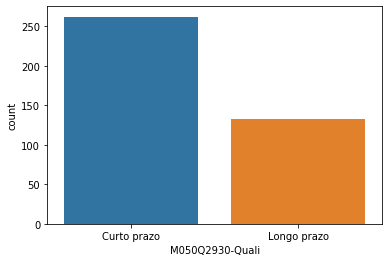

In [319]:
plt.figure()
sns.countplot(dados['M050Q2930-Quali'])

In [361]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)
x = dados[['M05Q02630']]
#x = dados[['M05Q02640','M05Q00100','M05Q00200']]
for size in [1,2,3,4]:
    xtrain,xtest,ytrain,ytest= train_test_split(x,dados['M050Q2930-Quali'], test_size = 0.2, random_state = size)
    rfc.fit(xtrain, ytrain)
    print(rfc.score(xtest,ytest))

0.6455696202531646
0.6329113924050633
0.5316455696202531
0.6582278481012658


In [362]:
print(confusion_matrix(rfc.predict(xtest),ytest))

[[52 27]
 [ 0  0]]


In [334]:
from sklearn.neighbors import KNeighborsClassifier

In [371]:
knn = KNeighborsClassifier(n_neighbors = 5)
x = dados[['M05Q02630','M05Q00100']]
for size in [1,2,3,4]:
    xtrain,xtest,ytrain,ytest= train_test_split(x,dados['M050Q2930-Quali'], test_size = 0.1, random_state = size)
    knn.fit(xtrain, ytrain)
    print(knn.score(xtest,ytest))

0.575
0.675
0.55
0.675


In [372]:
print(confusion_matrix(knn.predict(xtest),ytest))

[[21 10]
 [ 3  6]]


In [373]:
##Não adianta, tamo na merda valeu falows
last = pd.read_csv('Iegm_indicadores_saneamento2017.csv')

In [380]:
last.dropna(how='any',axis = 0,inplace = True)
last.drop('Unnamed: 0', axis = 1, inplace = True)

In [381]:
last.corr()

,cod_ibge,M05Q02650,M05Q02630,M05Q02640,M05Q00100,M05Q00200,M05Q00300,M05Q00600,M05Q00800,M05Q00900,M05Q01400,Tx cobertura da coleta RDO em relação à pop. total(%),Massa [RDO+RPU] coletada per capita em relação à pop. urbana(Kg/(hab.x dia)),Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%),Consumo médio percapita de água
cod_ibge,1.000000,0.004551,0.013777,-0.040354,0.060641,0.108647,0.042864,0.066040,0.012589,-0.036380,0.005607,-0.018894,0.041918,0.018014,-0.023427
M05Q02650,0.004551,1.000000,0.571112,0.587602,0.059723,0.172778,0.044351,0.071714,-0.016193,0.039676,-0.097906,-0.116030,-0.035757,0.047871,0.012899
M05Q02630,0.013777,0.571112,1.000000,0.840064,0.052207,0.003014,-0.025683,-0.020746,0.043221,0.010671,-0.069065,-0.089959,-0.045321,0.038812,-0.084110
M05Q02640,-0.040354,0.587602,0.840064,1.000000,0.003393,0.028570,-0.043118,-0.017886,0.001682,0.056197,0.000991,-0.093370,-0.054054,0.093835,-0.029969
M05Q00100,0.060641,0.059723,0.052207,0.003393,1.000000,0.117945,0.281609,0.033695,0.144654,0.060220,-0.039766,0.168315,-0.105473,-0.049067,0.107010
M05Q00200,0.108647,0.172778,0.003014,0.028570,0.117945,1.000000,0.130494,0.152213,0.159426,0.108335,0.099020,-0.028801,0.035508,-0.048772,0.136361
M05Q00300,0.042864,0.044351,-0.025683,-0.043118,0.281609,0.130494,1.000000,0.081887,-0.021938,0.137774,0.107175,0.199859,-0.071709,-0.157879,0.072398
M05Q00600,0.066040,0.071714,-0.020746,-0.017886,0.033695,0.152213,0.081887,1.000000,0.156798,0.093310,0.015305,-0.037653,-0.026355,0.087890,0.005026
M05Q00800,0.012589,-0.016193,0.043221,0.001682,0.144654,0.159426,-0.021938,0.156798,1.000000,0.215793,-0.043225,0.037708,-0.035462,0.022065,-0.009779
M05Q00900,-0.036380,0.039676,0.010671,0.056197,0.060220,0.108335,0.137774,0.093310,0.215793,1.000000,0.019480,0.065309,-0.051484,-0.115025,-0.017688


In [386]:
scale = StandardScaler()
scale.fit(last.drop(['Municipio','cod_ibge','Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%)'], axis=1))
scale_data = scale.transform(last.drop(['Municipio','cod_ibge','Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%)'], axis=1)) ##normalizando

pca = PCA(n_components=8) ##variar o numero de componentes que quero aqui
pca.fit(scale_data)  #Adaptando meu PCA ao scaled_data
x_pca = pca.transform(scale_data) #### criando meu x 

In [388]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
sizes = [0.1,0.2,0.3,0.4]
x = last.drop(['cod_ibge','Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%)','Municipio'], axis = 1)
for size in sizes:
    xtrain,xtest,ytrain,ytest= train_test_split(x_pca,last['Taxa de recuperação de recicláveis em relação à quantidade de RDO e RPU(%)'], test_size = size)
    lm.fit(xtrain,ytrain)
    print(lm.score(xtest,ytest))

-0.0002885786052884143
-0.19227163537849923
0.033532791095191694
-0.10951934218769055


In [389]:
data = pd.read_csv('Iegm2014.csv')

In [390]:
data

,Unnamed: 0,cod_ibge,Municipio,M05Q00100,M05Q00200,M05Q00300,M05Q00600,M05Q00501,M05Q00800,M05Q00900
0,0,350020,Adolfo,1,0,1,0,1,1,1
1,1,350120,Álvares Florence,0,0,0,0,1,0,0
2,2,350030,Aguaí,0,0,0,0,0,1,0
3,3,350040,Águas da Prata,1,0,0,0,1,1,1
4,4,350050,Águas de Lindóia,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
639,639,355670,Vinhedo,0,1,0,1,1,1,1
640,640,355690,Vista Alegre do Alto,0,0,0,0,1,1,1
641,641,355695,Vitória Brasil,0,0,0,1,1,1,1
642,642,355700,Votorantim,1,1,1,0,1,1,1
